# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Muhammad Rheza Iwanul Hakim
- Email: Rheza.hakim.89@gmail.com
- Id Dicoding: rheza89

## Persiapan

### Menyiapkan library yang dibutuhkan

In [4]:
!python3 -m venv new_env


In [5]:
!pip install hvplot holoviews bokeh
!pip install --upgrade scikit-learn

In [8]:
import hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE


### Menyiapkan data yang akan digunakan

In [9]:
url = 'https://drive.google.com/uc?id=1SV1ffv0g9s9oAoMwKgVJLaKdH09BJheS'  # Updated URL to access the raw CSV file
df = pd.read_csv(url,delimiter=';')
# https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m
# https://drive.google.com/file/d/1SV1ffv0g9s9oAoMwKgVJLaKdH09BJheS/view?usp=drive_link

## Data Understanding

In [10]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [12]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [14]:
# Find Number of Unique Value for every columns
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Marital_status: Number of unique values 6
Application_mode: Number of unique values 18
Application_order: Number of unique values 8
Course: Number of unique values 17
Daytime_evening_attendance: Number of unique values 2
Previous_qualification: Number of unique values 17
Previous_qualification_grade: Number of unique values 101
Nacionality: Number of unique values 21
Mothers_qualification: Number of unique values 29
Fathers_qualification: Number of unique values 34
Mothers_occupation: Number of unique values 32
Fathers_occupation: Number of unique values 46
Admission_grade: Number of unique values 620
Displaced: Number of unique values 2
Educational_special_needs: Number of unique values 2
Debtor: Number of unique values 2
Tuition_fees_up_to_date: Number of unique values 2
Gender: Number of unique values 2
Scholarship_holder: Number of unique values 2
Age_at_enrollment: Number of unique values 46
International: Number of unique values 2
Curricular_units_1st_sem_credited: Number of uniq

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


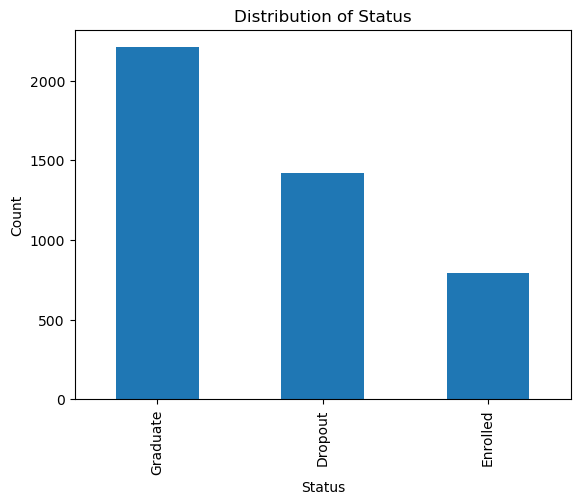

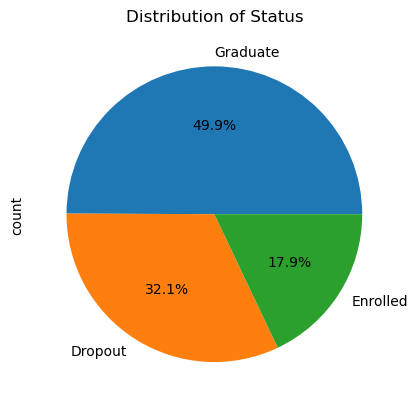

In [15]:
# Check the distribution of values in the 'Attrition' column
print(df['Status'].value_counts())

# Visualize the distribution using a bar plot
df['Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Or using a pie chart
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

## Data Preparation / Preprocessing

In [16]:
# Check for NaN values in the 'Status' column
print(df['Status'].isnull().sum())

0


In [17]:
df_filtered = df[df['Status'] != 'Enrolled'].copy()
df_filtered.reset_index(drop=True, inplace=True)

# Verify the filtering by checking the value counts in the new dataframe
print(df_filtered['Status'].value_counts())

# Display the first few rows of the filtered dataframe
print(df_filtered.head())

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1       

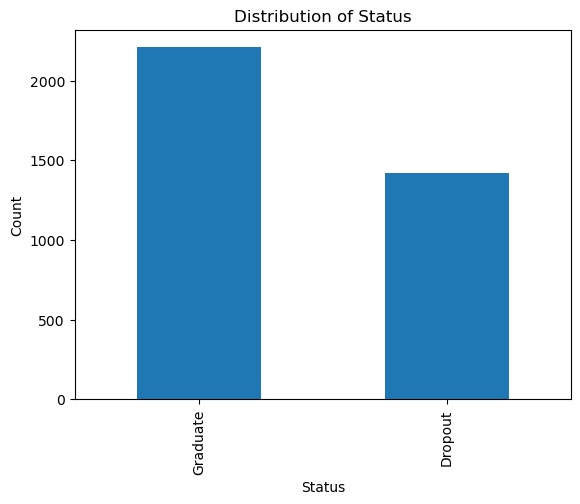

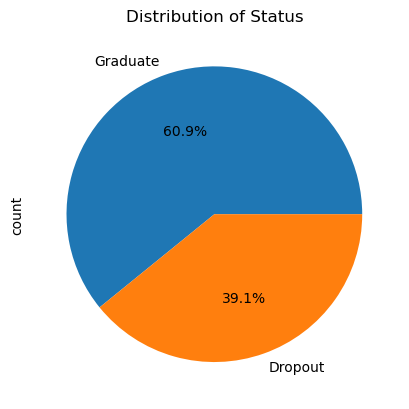

In [18]:
# Visualize the distribution using a bar plot
df_filtered['Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Or using a pie chart
df_filtered['Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

In [19]:
label = LabelEncoder()
df_filtered["Status1"] = label.fit_transform(df_filtered.Status)

Status1
1    2209
0    1421
Name: count, dtype: int64


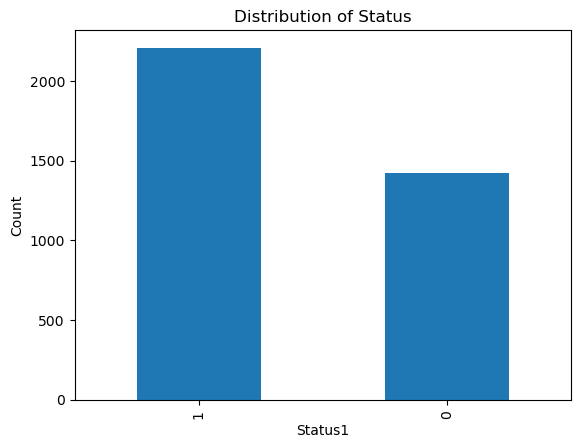

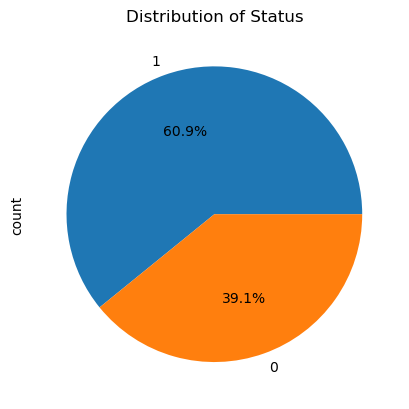

In [20]:
# Check the distribution of values in the 'Status1' column
print(df_filtered['Status1'].value_counts())

# Visualize the distribution using a bar plot
df_filtered['Status1'].value_counts().plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status1')
plt.ylabel('Count')
plt.show()

# Or using a pie chart
df_filtered['Status1'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

# Found that dropout = 0

In [21]:
cont_col = []
for column in df_filtered.columns:
    if df_filtered[column].dtypes != object and df_filtered[column].nunique() > 1:
        print(f"{column} : Minimum: {df_filtered[column].min()}, Maximum: {df_filtered[column].max()}")
        cont_col.append(column)
        print("====================================")

Marital_status : Minimum: 1, Maximum: 6
Application_mode : Minimum: 1, Maximum: 57
Application_order : Minimum: 0, Maximum: 6
Course : Minimum: 33, Maximum: 9991
Daytime_evening_attendance : Minimum: 0, Maximum: 1
Previous_qualification : Minimum: 1, Maximum: 43
Previous_qualification_grade : Minimum: 95.0, Maximum: 190.0
Nacionality : Minimum: 1, Maximum: 109
Mothers_qualification : Minimum: 1, Maximum: 44
Fathers_qualification : Minimum: 1, Maximum: 44
Mothers_occupation : Minimum: 0, Maximum: 194
Fathers_occupation : Minimum: 0, Maximum: 195
Admission_grade : Minimum: 95.0, Maximum: 190.0
Displaced : Minimum: 0, Maximum: 1
Educational_special_needs : Minimum: 0, Maximum: 1
Debtor : Minimum: 0, Maximum: 1
Tuition_fees_up_to_date : Minimum: 0, Maximum: 1
Gender : Minimum: 0, Maximum: 1
Scholarship_holder : Minimum: 0, Maximum: 1
Age_at_enrollment : Minimum: 17, Maximum: 70
International : Minimum: 0, Maximum: 1
Curricular_units_1st_sem_credited : Minimum: 0, Maximum: 20
Curricular_uni

<Axes: >

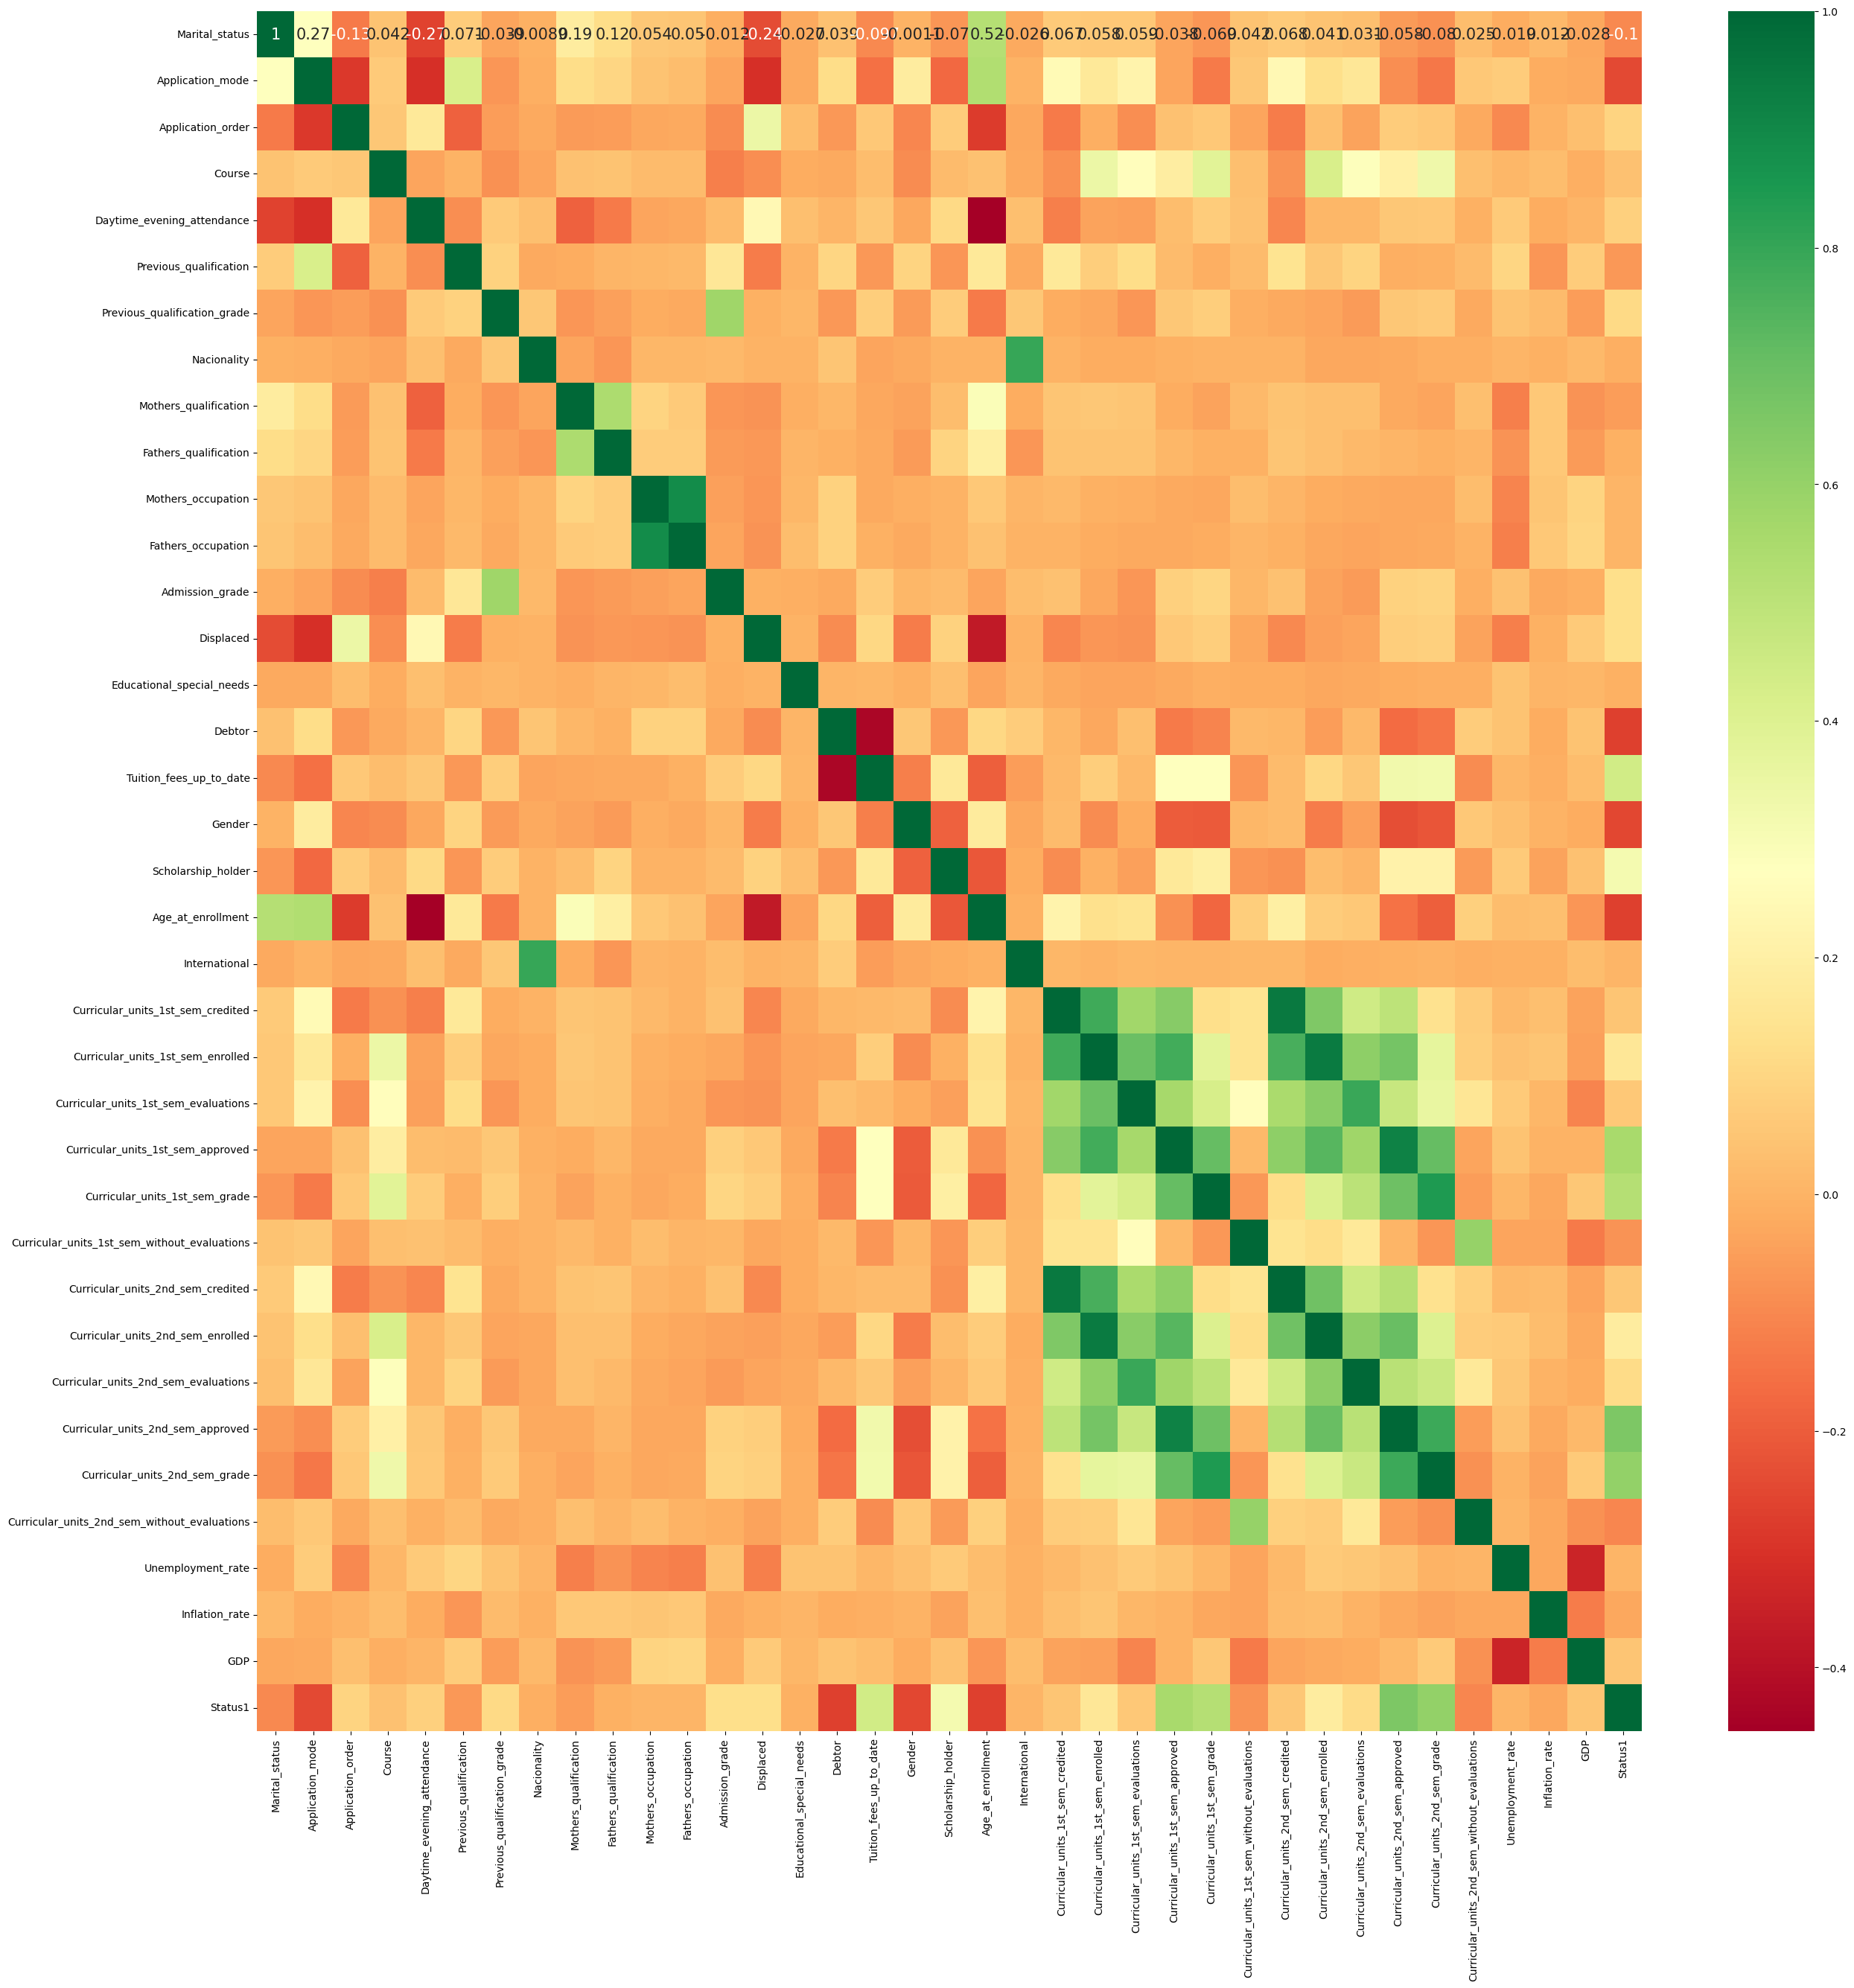

In [22]:
plt.figure(figsize=(30, 30))
# Select only numeric columns for correlation calculation
numeric_df = df_filtered.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 15})

<Axes: >

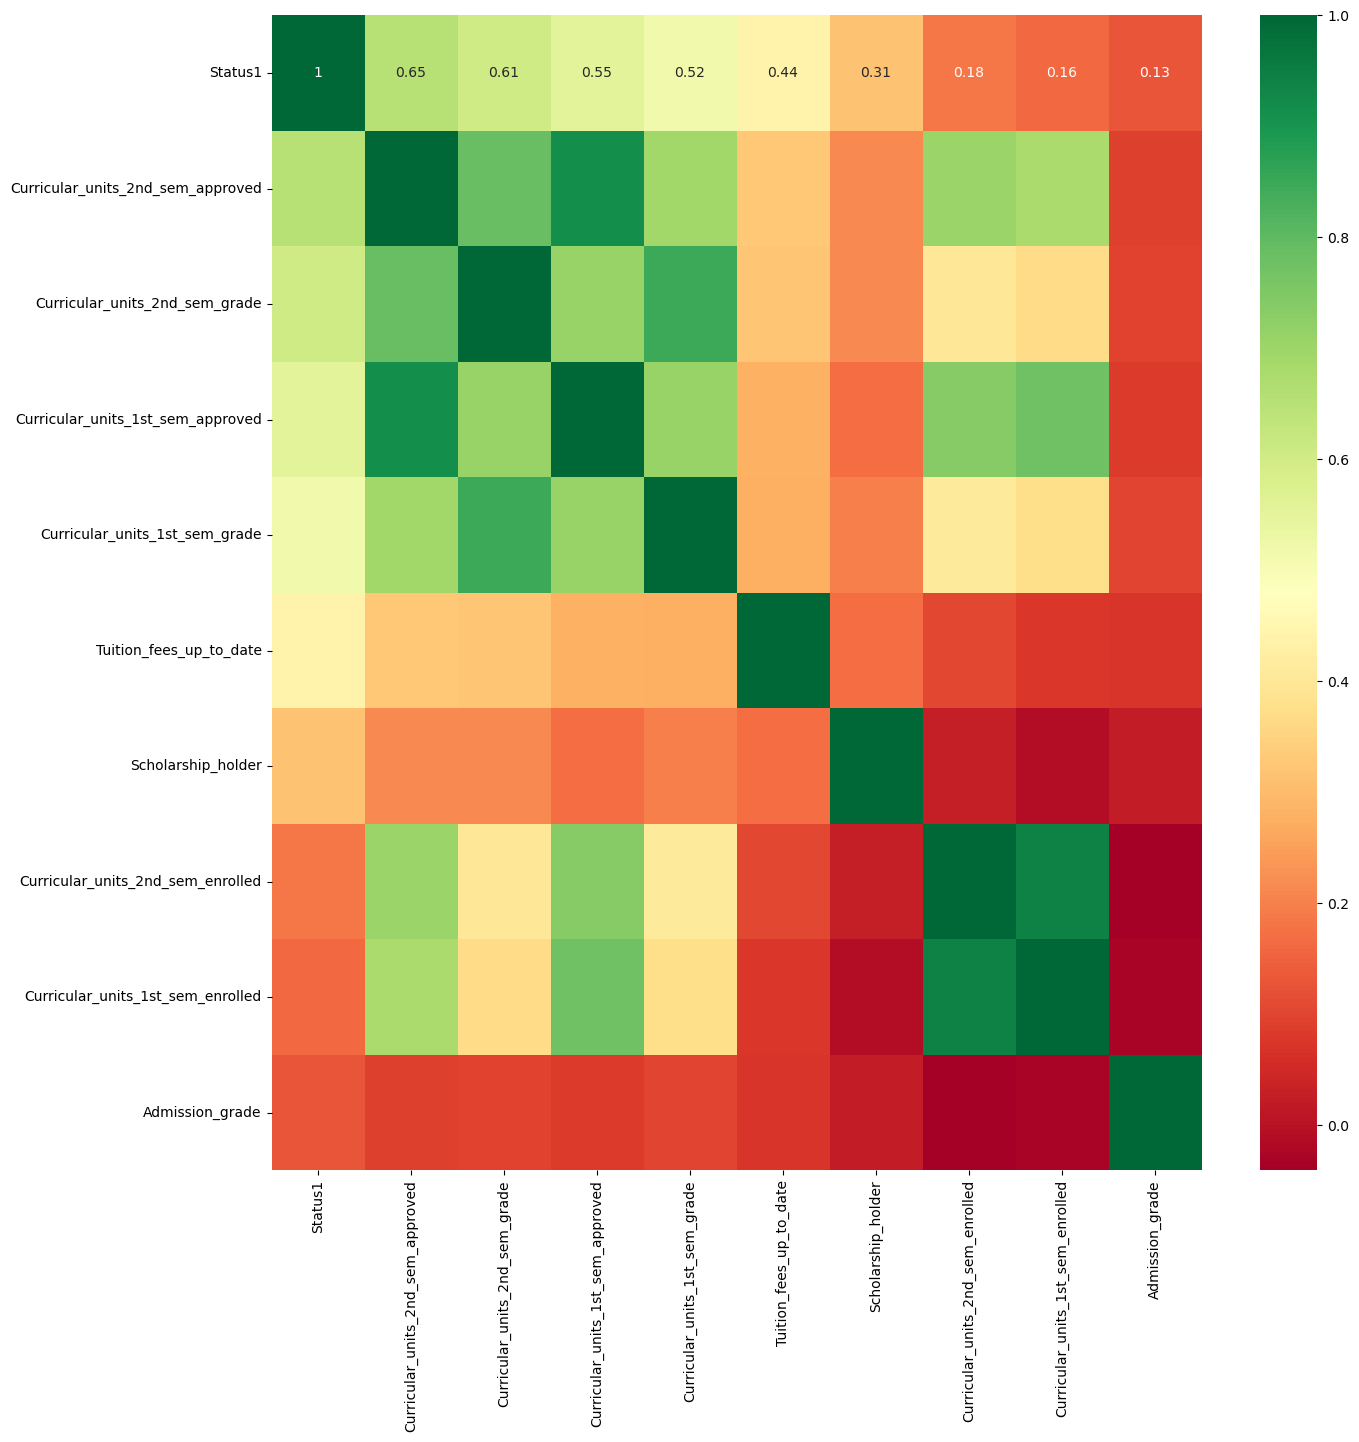

In [23]:
col = numeric_df.corr().nlargest(10, "Status1").Status1.index
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [24]:
df_filtered.hvplot.hist(y='Curricular_units_2nd_sem_approved', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Curricular_units_2nd_sem_approved]   (Curricular_units_2nd_sem_approved_count)

In [25]:
df_filtered.hvplot.hist(y='Curricular_units_2nd_sem_grade', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Curricular_units_2nd_sem_grade]   (Curricular_units_2nd_sem_grade_count)

In [26]:
df_filtered.hvplot.hist(y='Curricular_units_1st_sem_approved', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Curricular_units_1st_sem_approved]   (Curricular_units_1st_sem_approved_count)

In [27]:
df_filtered.hvplot.hist(y='Curricular_units_1st_sem_grade', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Curricular_units_1st_sem_grade]   (Curricular_units_1st_sem_grade_count)

In [28]:
df_filtered.hvplot.hist(y='Tuition_fees_up_to_date', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Tuition_fees_up_to_date]   (Tuition_fees_up_to_date_count)

In [29]:
df_filtered.hvplot.hist(y='Scholarship_holder', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Scholarship_holder]   (Scholarship_holder_count)

In [30]:
df_filtered.hvplot.hist(y='Gender', by='Status1', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Status1]
   :Histogram   [Gender]   (Gender_count)

In [31]:
dummy_col = [column for column in df_filtered.drop('Status1', axis=1).columns if df_filtered[column].nunique() < 20]
data = pd.get_dummies(df_filtered, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Columns: 167 entries, Previous_qualification_grade to Status_Graduate
dtypes: float64(4), int32(1), int64(12), uint8(150)
memory usage: 999.8 KB


## Modeling

In [32]:
X = df_filtered.drop(['Status1','Status'], axis=1)
y = df_filtered.Status1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [33]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [34]:
y_test.value_counts()[0] / y_test.shape[0]

0.39118457300275483

In [35]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 39.16%
Leaving Rate: 60.84%
===============TEST=================
Staying Rate: 39.12%
Leaving Rate: 60.88%


In [37]:



X_train_res, y_train_res = X_train_std, y_train

# Check the distribution of the resampled training data
print("Distribution of y_train after SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Random Forest Model
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_std)

print("\nRandom Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_std)[:, 1]))

# Logistic Regression Model
print("\nTraining Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets and binary classification
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test_std)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr_model.predict_proba(X_test_std)[:, 1]))

# Hyperparameter Tuning for Random Forest using RandomizedSearchCV
print("\nPerforming Hyperparameter Tuning for Random Forest...")
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use StratifiedKFold for cross-validation since we have imbalanced data (though SMOTE helped, it's still good practice)
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=cv_stratified,
    verbose=2,
    random_state=42,
    n_jobs=-1, # Use all available cores
    scoring='roc_auc' # Optimize for ROC AUC
)

random_search_rf.fit(X_train_res, y_train_res)

print("\nBest parameters found by RandomizedSearchCV (Random Forest):")
print(random_search_rf.best_params_)

best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_std)

Distribution of y_train after SMOTE:
Status1
1    1546
0     995
Name: count, dtype: int64
Training Random Forest Classifier...

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       426
           1       0.89      0.94      0.91       663

    accuracy                           0.89      1089
   macro avg       0.89      0.88      0.89      1089
weighted avg       0.89      0.89      0.89      1089

Confusion Matrix:
[[348  78]
 [ 39 624]]
Accuracy: 0.8925619834710744
ROC AUC Score: 0.9420704721036122

Training Logistic Regression Model...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       426
           1       0.90      0.96      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089

Co

c:\Users\rheza\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rheza\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rheza\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\rheza\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\rheza\anaconda3\Lib\site-packages\


Best parameters found by RandomizedSearchCV (Random Forest):
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}


## Evaluation


Best Tuned Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       426
           1       0.89      0.95      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089

Confusion Matrix:
[[346  80]
 [ 32 631]]
Accuracy: 0.8971533516988063
ROC AUC Score: 0.9464236398784867

Feature Importance from the Best Random Forest Model:
                                 feature  importance
30     Curricular_units_2nd_sem_approved    0.260450
31        Curricular_units_2nd_sem_grade    0.150605
24     Curricular_units_1st_sem_approved    0.145363
25        Curricular_units_1st_sem_grade    0.074951
16               Tuition_fees_up_to_date    0.069214
29  Curricular_units_2nd_sem_evaluations    0.033241
19                     Age_at_enrollment    0.028046
23  Curricular_units_1st_sem_evaluations

c:\Users\rheza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rheza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rheza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


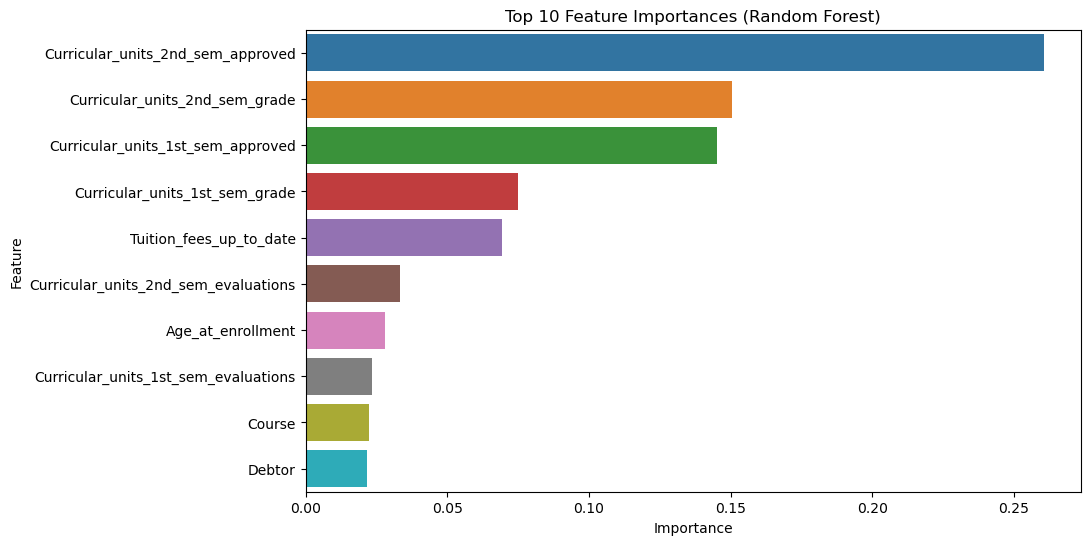

In [38]:
print("\nBest Tuned Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("ROC AUC Score:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test_std)[:, 1]))


# Feature Importance from the best Random Forest model
print("\nFeature Importance from the Best Random Forest Model:")
feature_importance_df = feature_imp(X_train, best_rf_model)
print(feature_importance_df.head(10)) # Display top 10 important features

# Visualization of top feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [39]:
joblib.dump(best_rf_model, "best_rf_model.joblib")

['best_rf_model.joblib']

In [40]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
